# Decision Tree
# Problem Statement:
# Use decision trees to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

In [33]:
# Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [34]:
#import Data
Data = pd.read_csv('Fraud_check.csv')

In [35]:
Data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


# EDA

In [36]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [37]:
Data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [38]:
Data.duplicated().drop_duplicates()

0    False
dtype: bool

In [39]:
Data.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [40]:
Data.nunique()

Undergrad            2
Marital.Status       3
Taxable.Income     599
City.Population    598
Work.Experience     31
Urban                2
dtype: int64

In [41]:
Data["Undergrad"].unique()

array(['NO', 'YES'], dtype=object)

In [42]:
Data["Marital.Status"].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [43]:
Data["Urban"].unique()

array(['YES', 'NO'], dtype=object)

In [44]:
Data.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [45]:
list(Data.columns)

['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban']

In [46]:
Data['Undergrad'].value_counts()

YES    312
NO     288
Name: Undergrad, dtype: int64

In [47]:
Data['Marital.Status'].value_counts()

Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64

In [48]:
Data['Urban'].value_counts()

YES    302
NO     298
Name: Urban, dtype: int64

In [49]:
f=np.empty(600, dtype=object)
i=0

for value in Data['Taxable.Income']:
    if value<=30000:
        f[i]='Risky'
    else:
        f[i]='Good'
    i=i+1   

In [50]:
f

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky', 'Risky', 'Good',
       'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good'

In [51]:
Data['Taxable.Income'].mean()

55208.375

In [52]:
f_t=pd.DataFrame(f,columns=["Response"])
f_t

,Response
0,Good
1,Good
2,Good
3,Good
4,Good
...,...
595,Good
596,Good
597,Good
598,Good


In [53]:
Data_1=pd.concat([Data,f_t],axis=1)
Data_1

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Response
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [54]:
Data_1.drop('Taxable.Income',inplace=True,axis=1)

In [55]:
Data_1

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,Response
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,Good
596,YES,Divorced,55369,2,YES,Good
597,NO,Divorced,154058,0,YES,Good
598,YES,Married,180083,17,NO,Good


In [57]:
Data_1.groupby(['Urban', 'Response', 'Undergrad', 'Marital.Status']).count()

City.Population  Work.Experience
Urban Response Undergrad Marital.Status                                  
NO    Good     NO        Divorced                     43               43
                         Married                      37               37
                         Single                       34               34
               YES       Divorced                     41               41
                         Married                      37               37
                         Single                       45               45
      Risky    NO        Divorced                     10               10
                         Married                       7                7
                         Single                       12               12
               YES       Divorced                      9                9
                         Married                      13               13
                         Single                       10               10
YES   Good     NO        Divorced                     37               37
                         Married                      35               35
                         Single                       44               44
               YES       Divorced                     32               32
                         Married                      40               40
                         Single                       51               51
      Risky    NO        Divorced                      7                7
                         Married                      12               12
                         Single                       10               10
               YES       Divorced                     10               10
                         Married                      13               13
                         Single                       11               11

In [59]:
en = LabelEncoder()
Data_1['Undergrad']= en.fit_transform(Data_1['Undergrad'])
Data_1['Marital.Status']= en.fit_transform(Data_1['Marital.Status'])
Data_1['Urban']= en.fit_transform(Data_1['Urban'])
Data_1['Response']= en.fit_transform(Data_1['Response'])

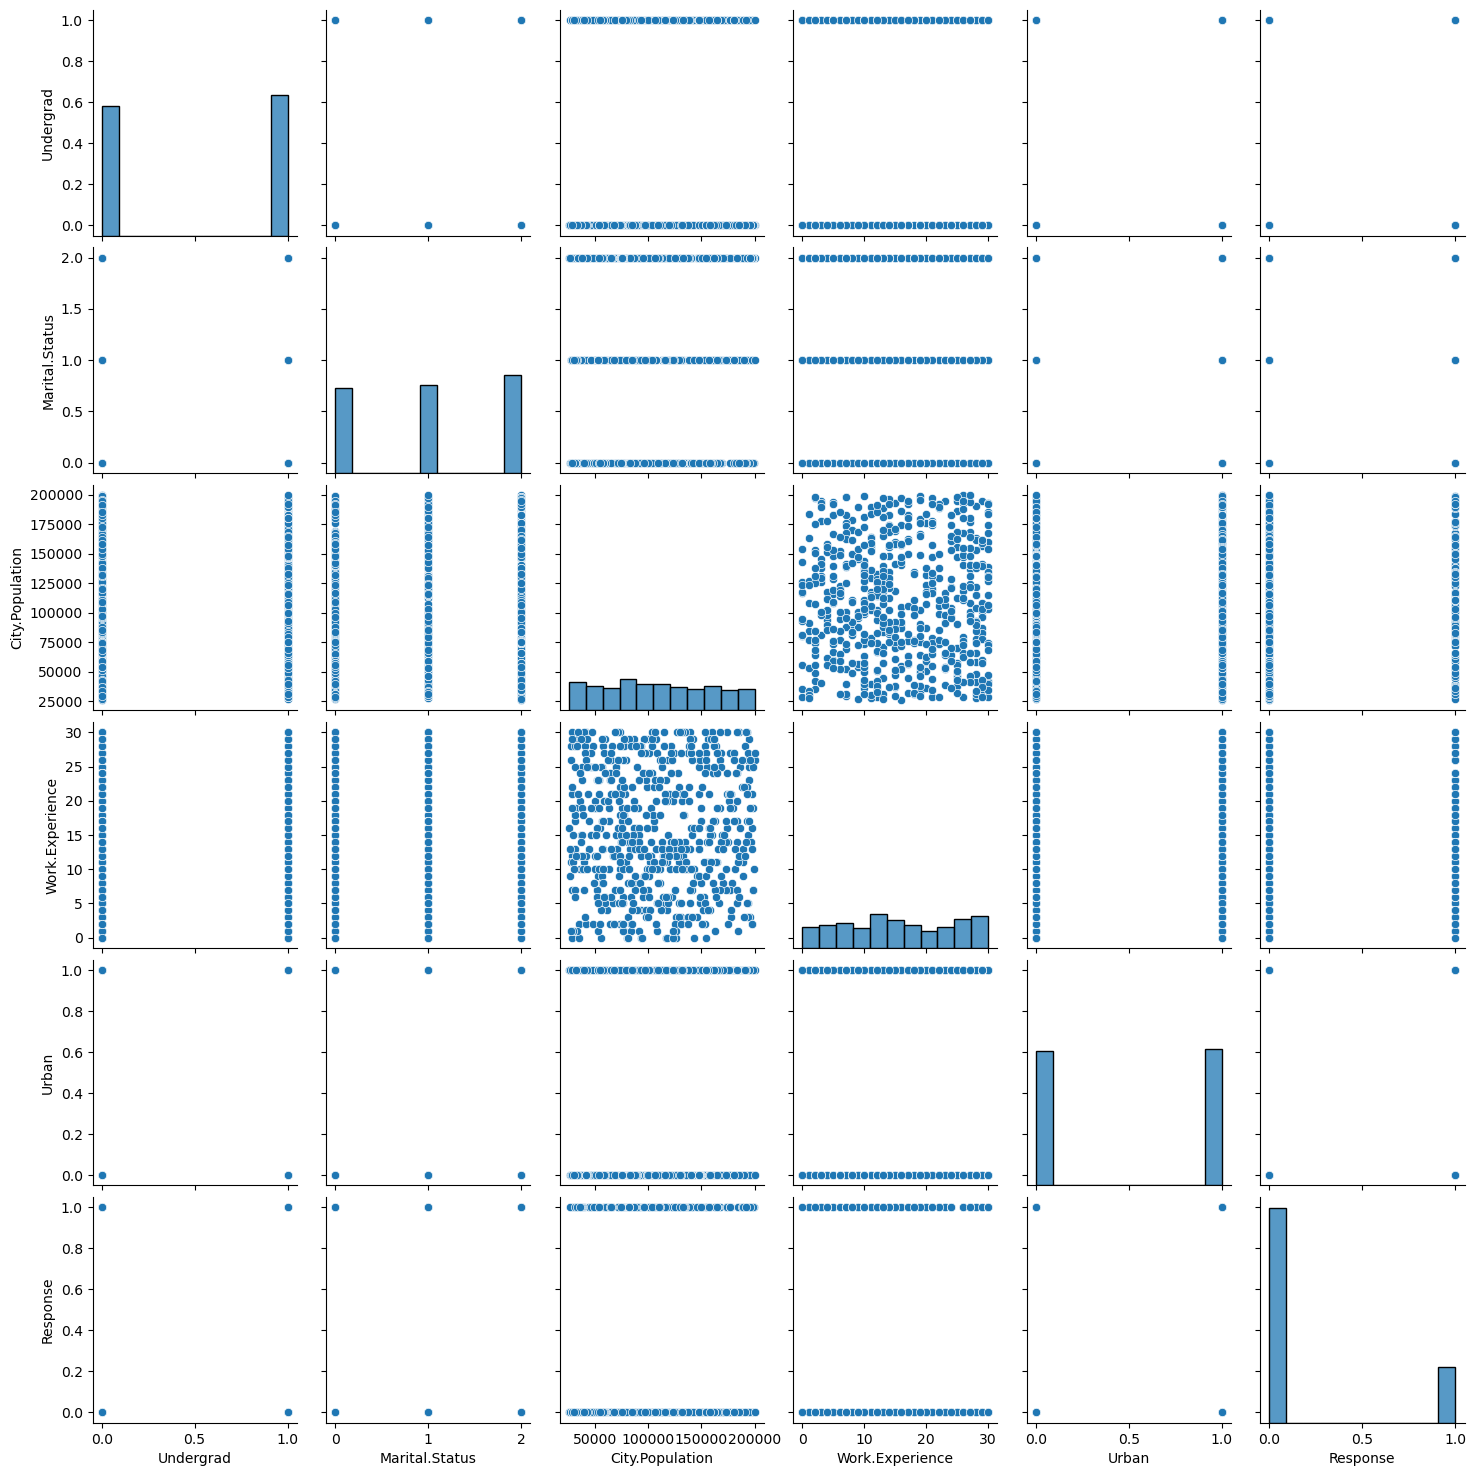

In [60]:
sns.pairplot(Data_1)

<AxesSubplot:>

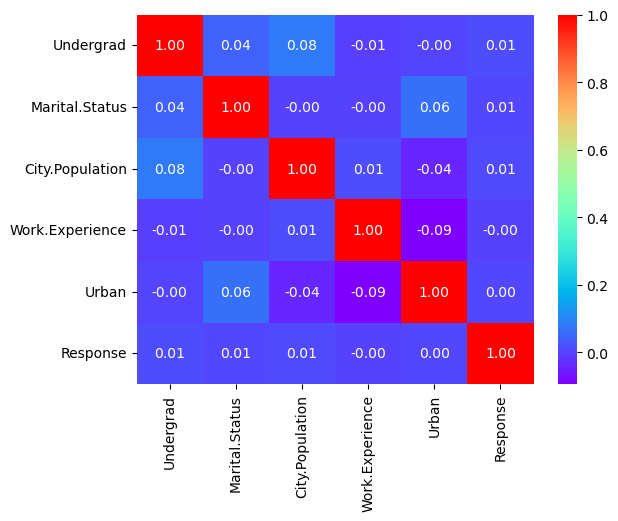

In [62]:
sns.heatmap(Data_1.corr(), cmap='rainbow', annot=True, fmt=".2f")

In [63]:
x = Data_1.iloc[:,0:5]
y = Data_1['Response']

In [64]:
x

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [65]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Response, Length: 600, dtype: int64

In [87]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=0)

In [88]:
xtrain

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
118,0,0,199174,10,0
362,1,0,75552,17,1
55,1,2,89965,16,1
90,0,0,101232,29,0
390,1,2,57324,17,0
...,...,...,...,...,...
277,0,0,117364,11,0
9,1,0,155482,4,1
359,1,2,157299,11,0
192,1,1,126556,10,1


In [89]:
xtest

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
434,1,2,87188,19,1
122,1,1,140762,26,0
224,0,1,55717,25,1
479,1,1,68995,21,0
205,0,1,131906,20,1
...,...,...,...,...,...
144,1,2,156503,29,1
386,0,2,140642,27,1
437,1,1,117250,20,1
313,1,2,124848,2,0


# Decision Tree model

# Building Decision Tree Classifier using Entropy Criteria

In [90]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=6)
model.fit(xtrain,ytrain) 

DecisionTreeClassifier(criterion='entropy', max_depth=6)

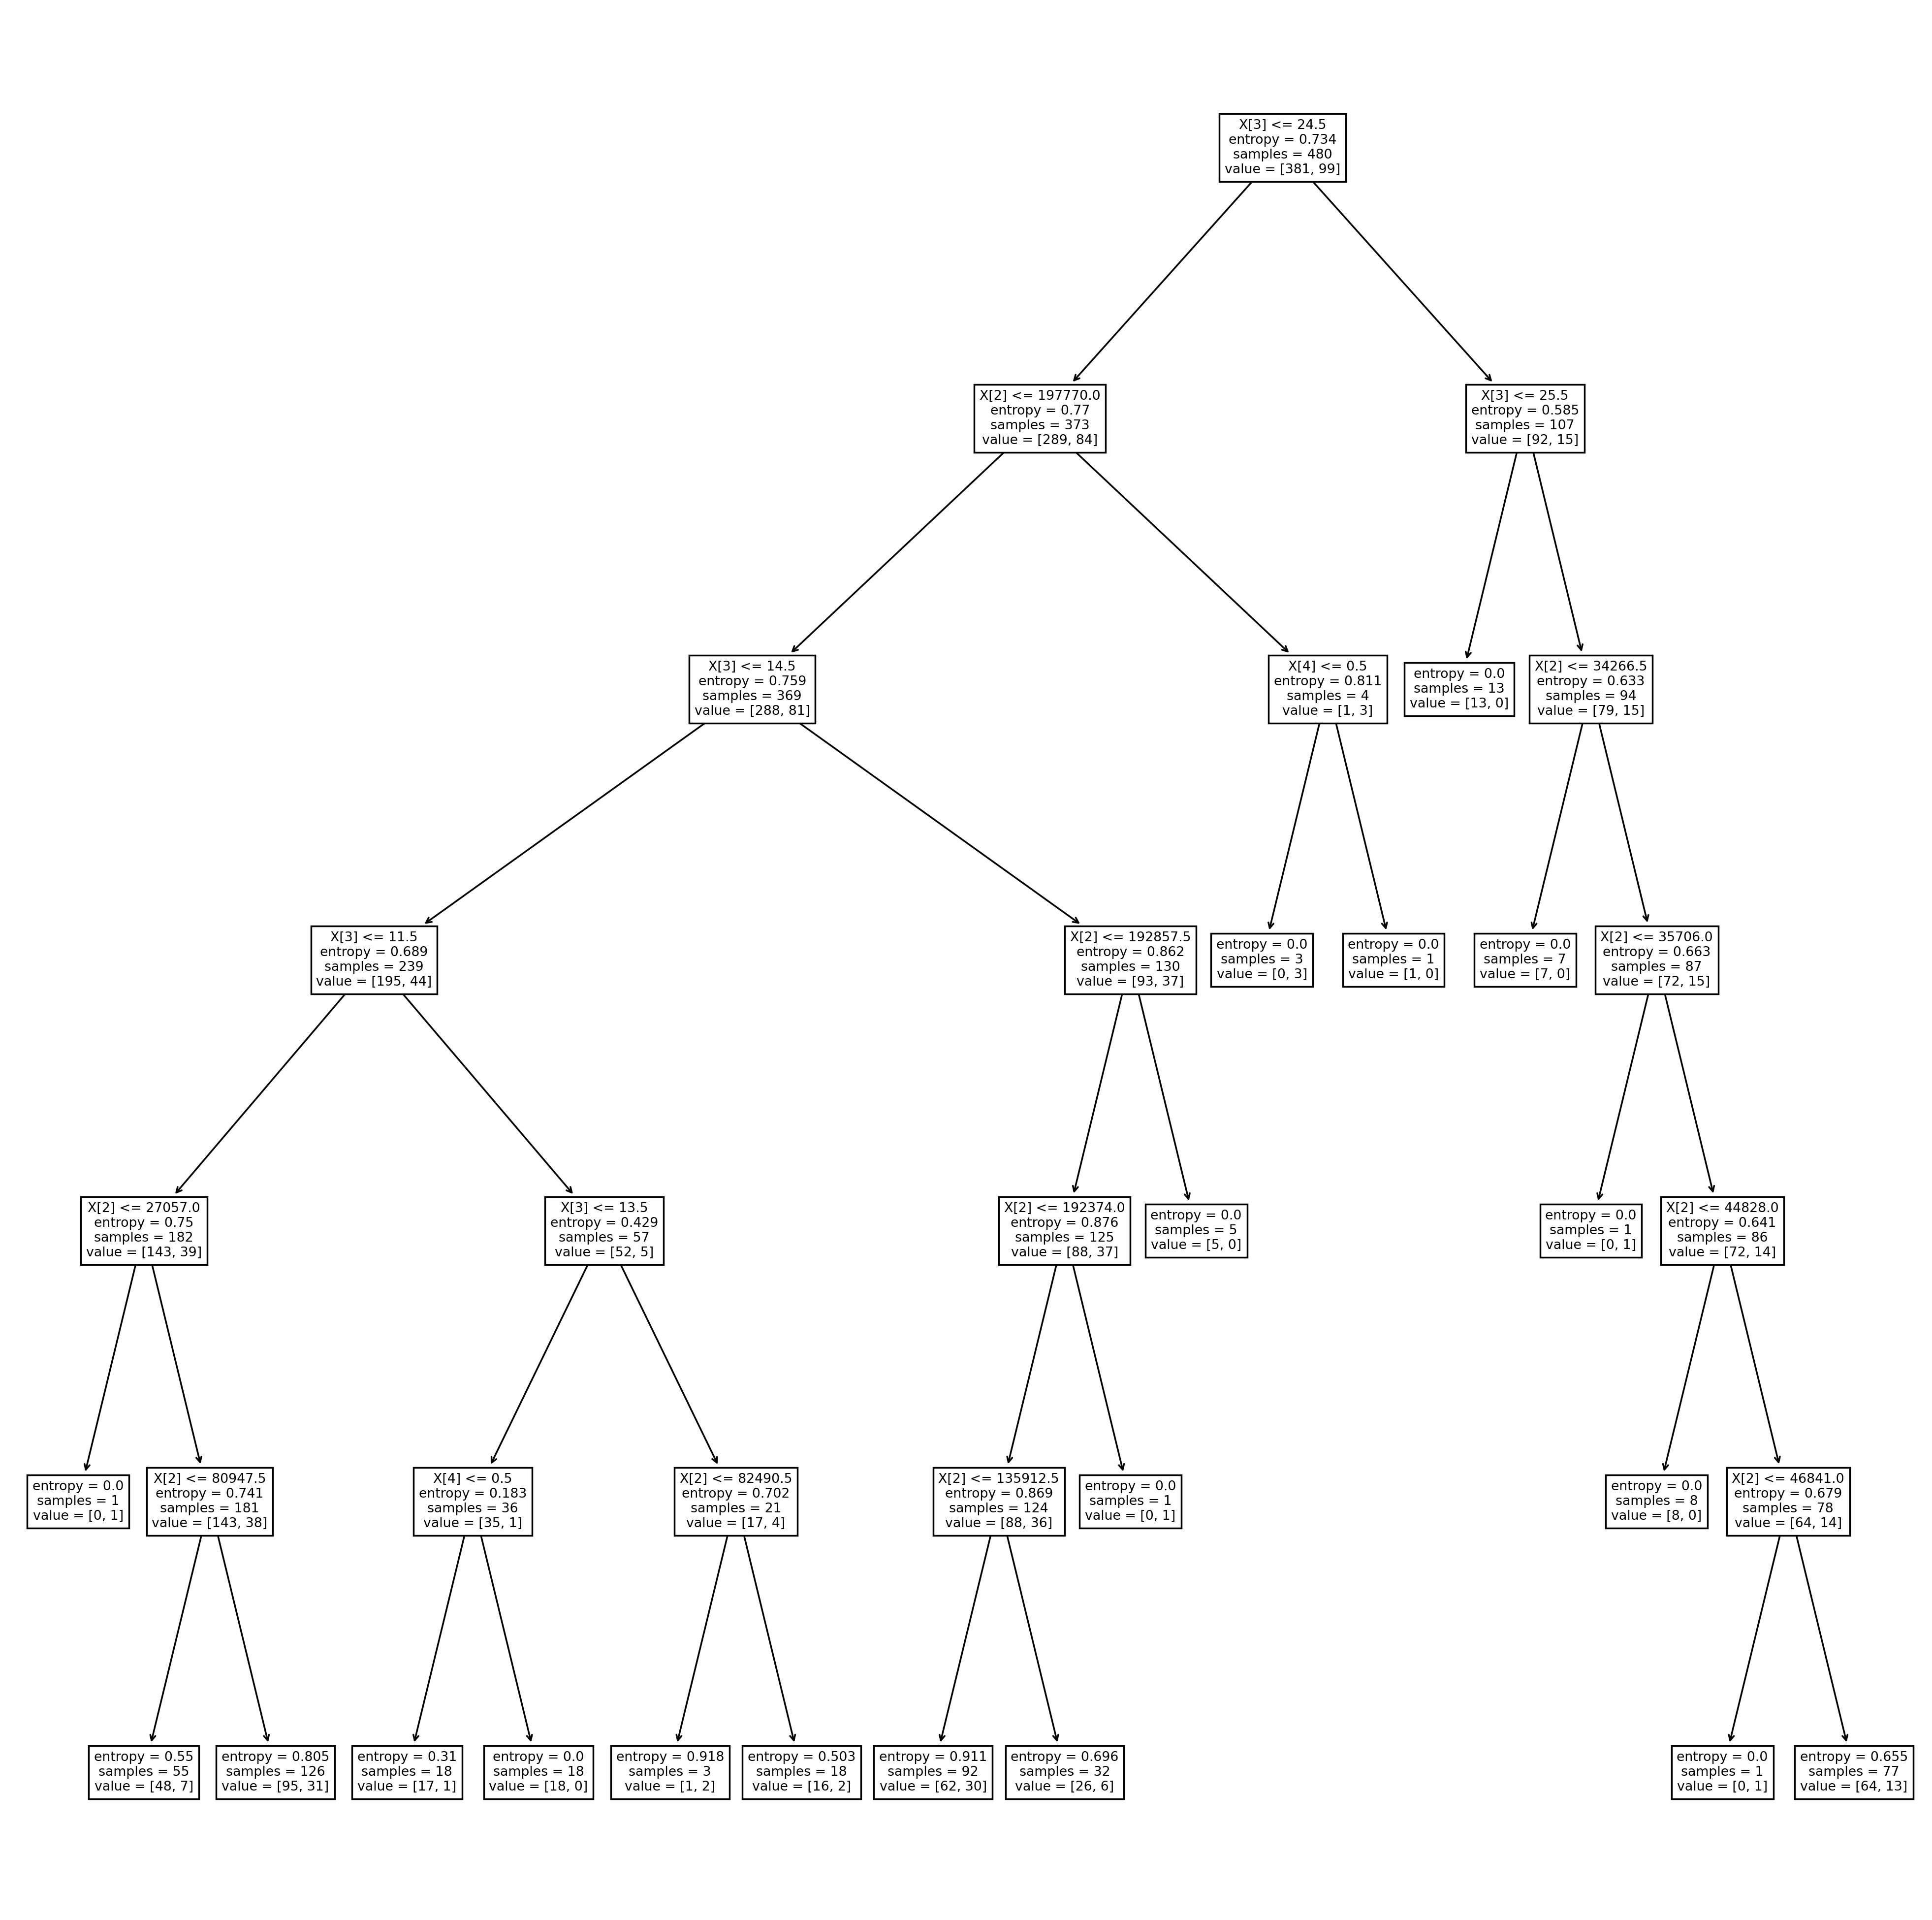

In [91]:
#PLot the decision tree
tree.plot_tree(model);

In [92]:
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.80      0.99      0.89        95
           1       0.67      0.08      0.14        25

    accuracy                           0.80       120
   macro avg       0.74      0.53      0.51       120
weighted avg       0.77      0.80      0.73       120



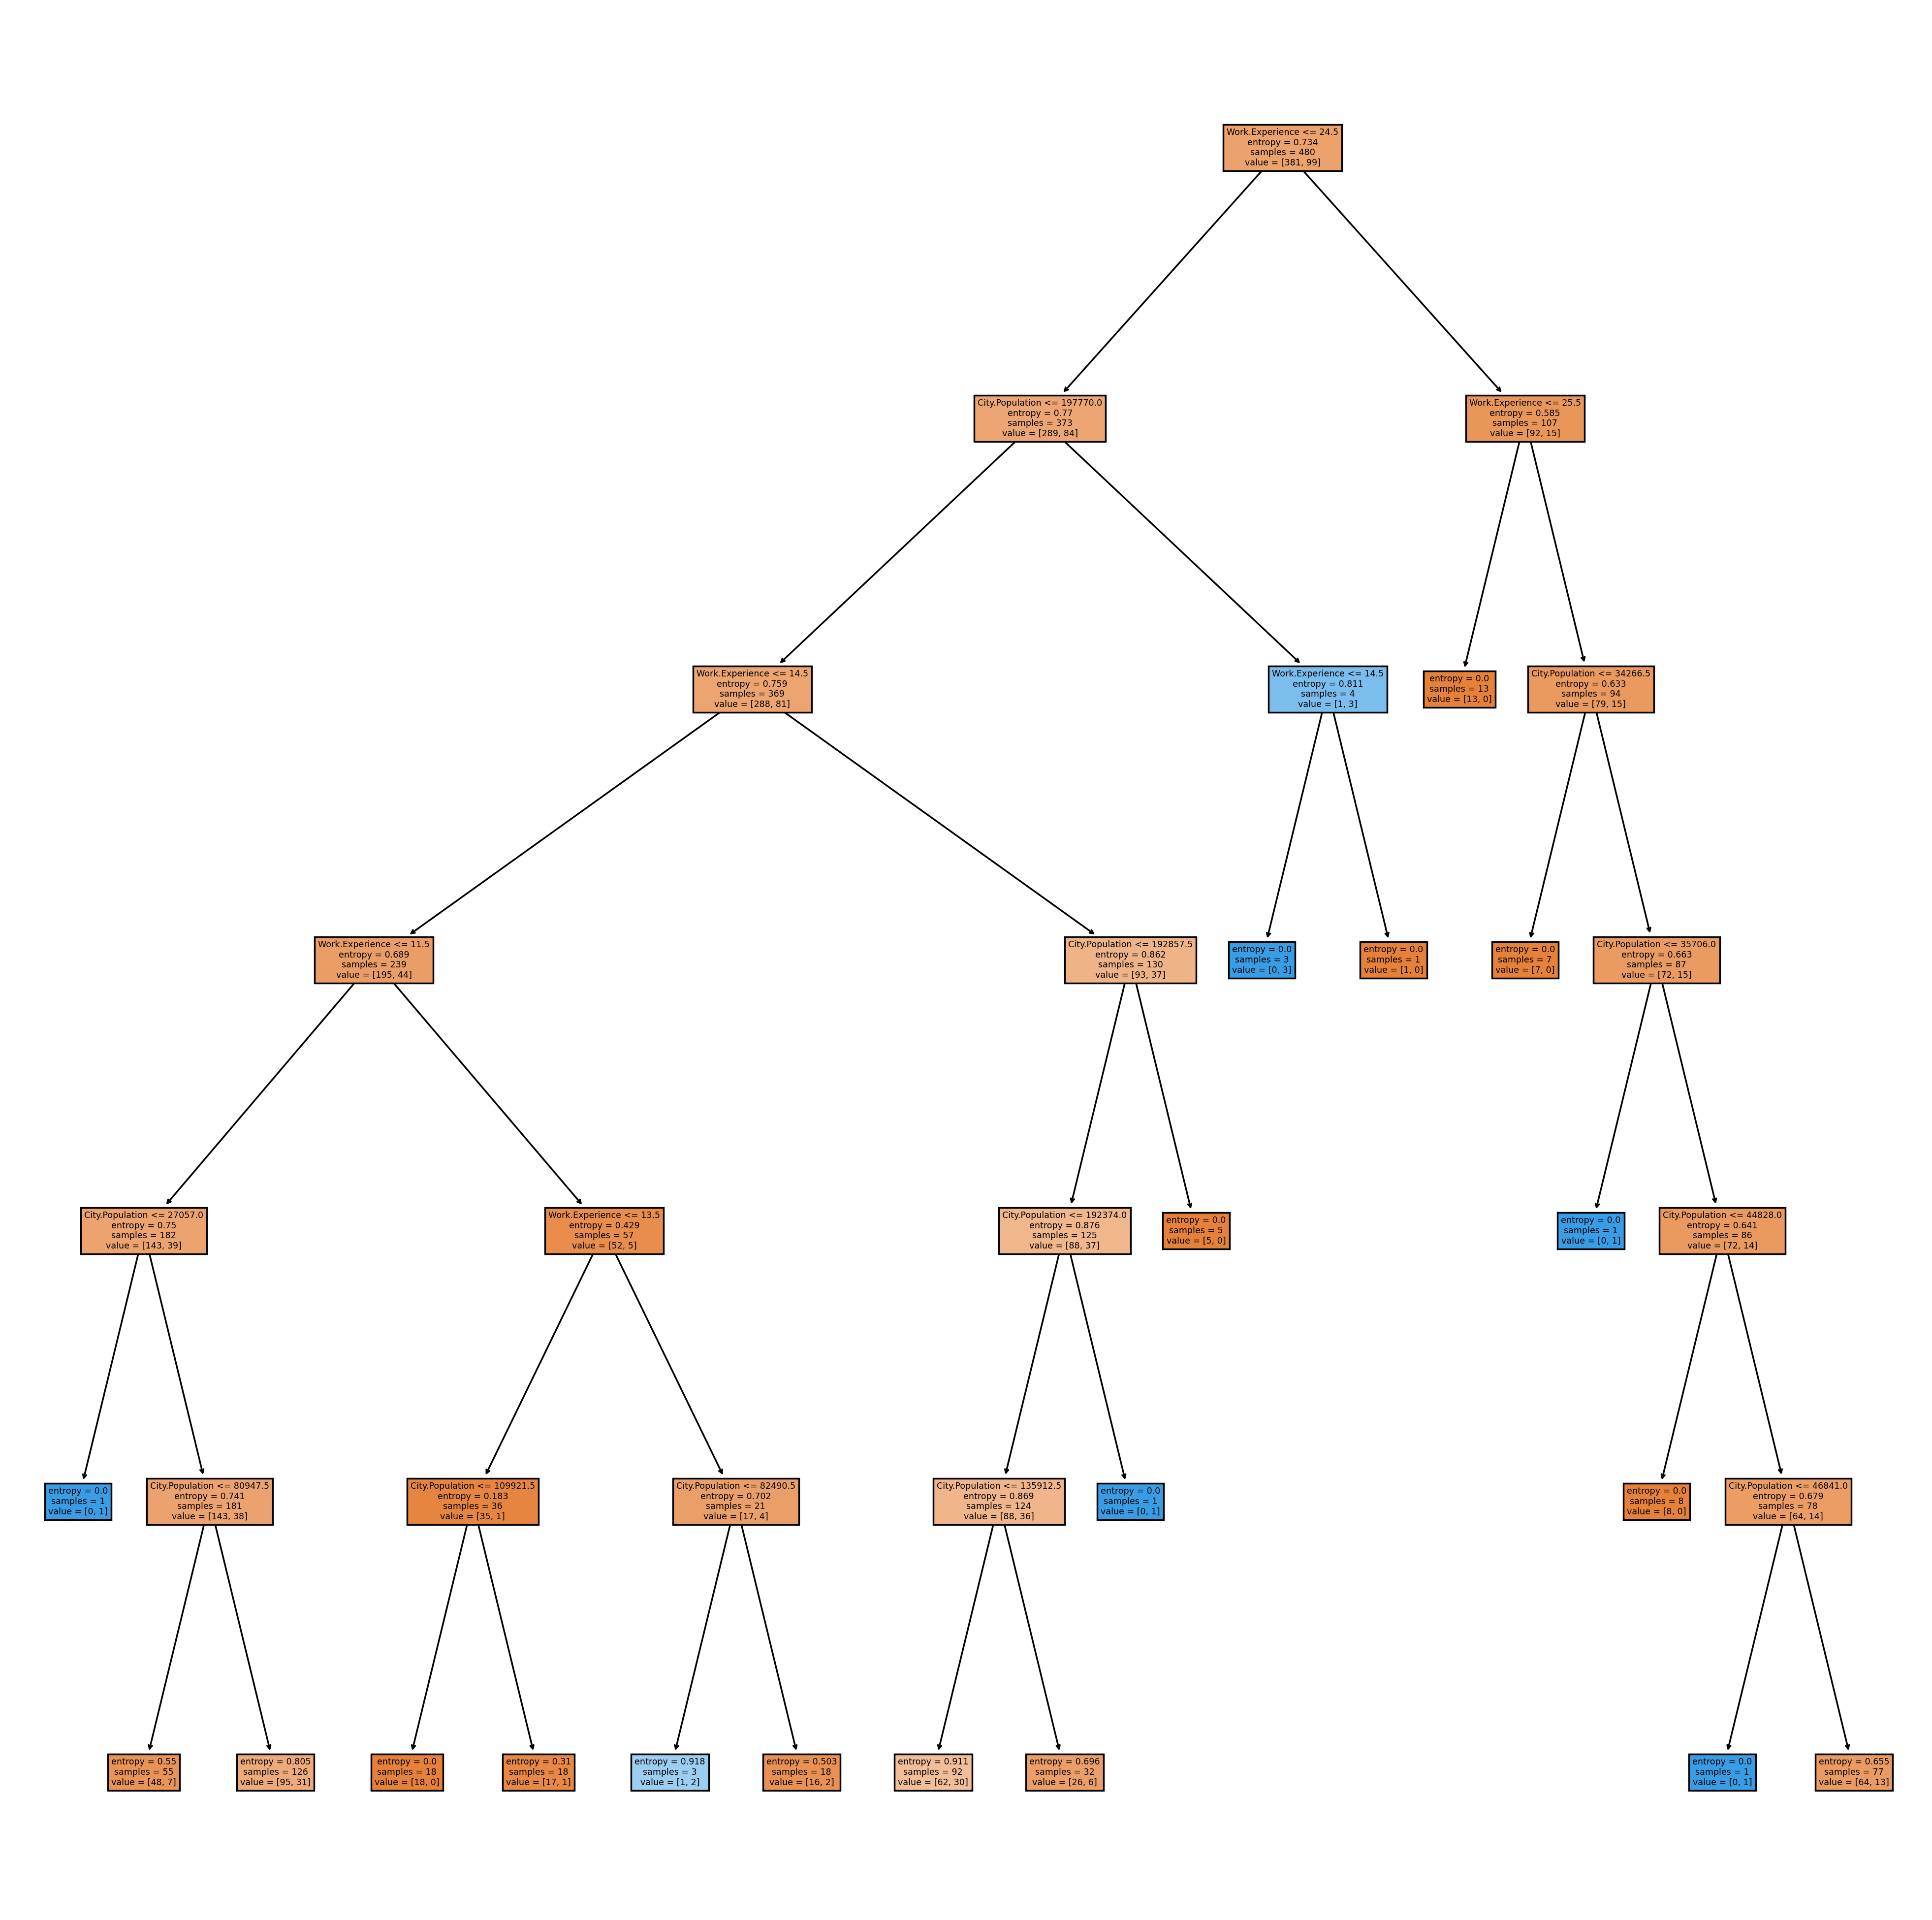

In [93]:
plt.rcParams['figure.figsize'] = (20,20)
plt.rcParams['figure.dpi'] = 250
tree.plot_tree(model, feature_names=x.columns,filled=True)
plt.show()

In [94]:
print("Training Accuracy:",model.score(xtrain,ytrain))
print("Testing Accuracy:" ,model.score(xtest,ytest))

Training Accuracy: 0.8104166666666667
Testing Accuracy: 0.8


In [95]:
text = tree.export_text(model,max_depth=3)  
print(text) 

|--- feature_3 <= 24.50
|   |--- feature_2 <= 197770.00
|   |   |--- feature_3 <= 14.50
|   |   |   |--- feature_3 <= 11.50
|   |   |   |   |--- truncated branch of depth 3
|   |   |   |--- feature_3 >  11.50
|   |   |   |   |--- truncated branch of depth 3
|   |   |--- feature_3 >  14.50
|   |   |   |--- feature_2 <= 192857.50
|   |   |   |   |--- truncated branch of depth 3
|   |   |   |--- feature_2 >  192857.50
|   |   |   |   |--- class: 0
|   |--- feature_2 >  197770.00
|   |   |--- feature_3 <= 14.50
|   |   |   |--- class: 1
|   |   |--- feature_3 >  14.50
|   |   |   |--- class: 0
|--- feature_3 >  24.50
|   |--- feature_3 <= 25.50
|   |   |--- class: 0
|   |--- feature_3 >  25.50
|   |   |--- feature_2 <= 34266.50
|   |   |   |--- class: 0
|   |   |--- feature_2 >  34266.50
|   |   |   |--- feature_2 <= 35706.00
|   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  35706.00
|   |   |   |   |--- truncated branch of depth 3



In [96]:
model.feature_importances_ 

array([0.        , 0.        , 0.58397509, 0.41602491, 0.        ])

In [97]:
import pandas as pd
feature_imp = pd.Series(model.feature_importances_,index=x.columns).sort_values(ascending=False) 
feature_imp

City.Population    0.583975
Work.Experience    0.416025
Undergrad          0.000000
Marital.Status     0.000000
Urban              0.000000
dtype: float64

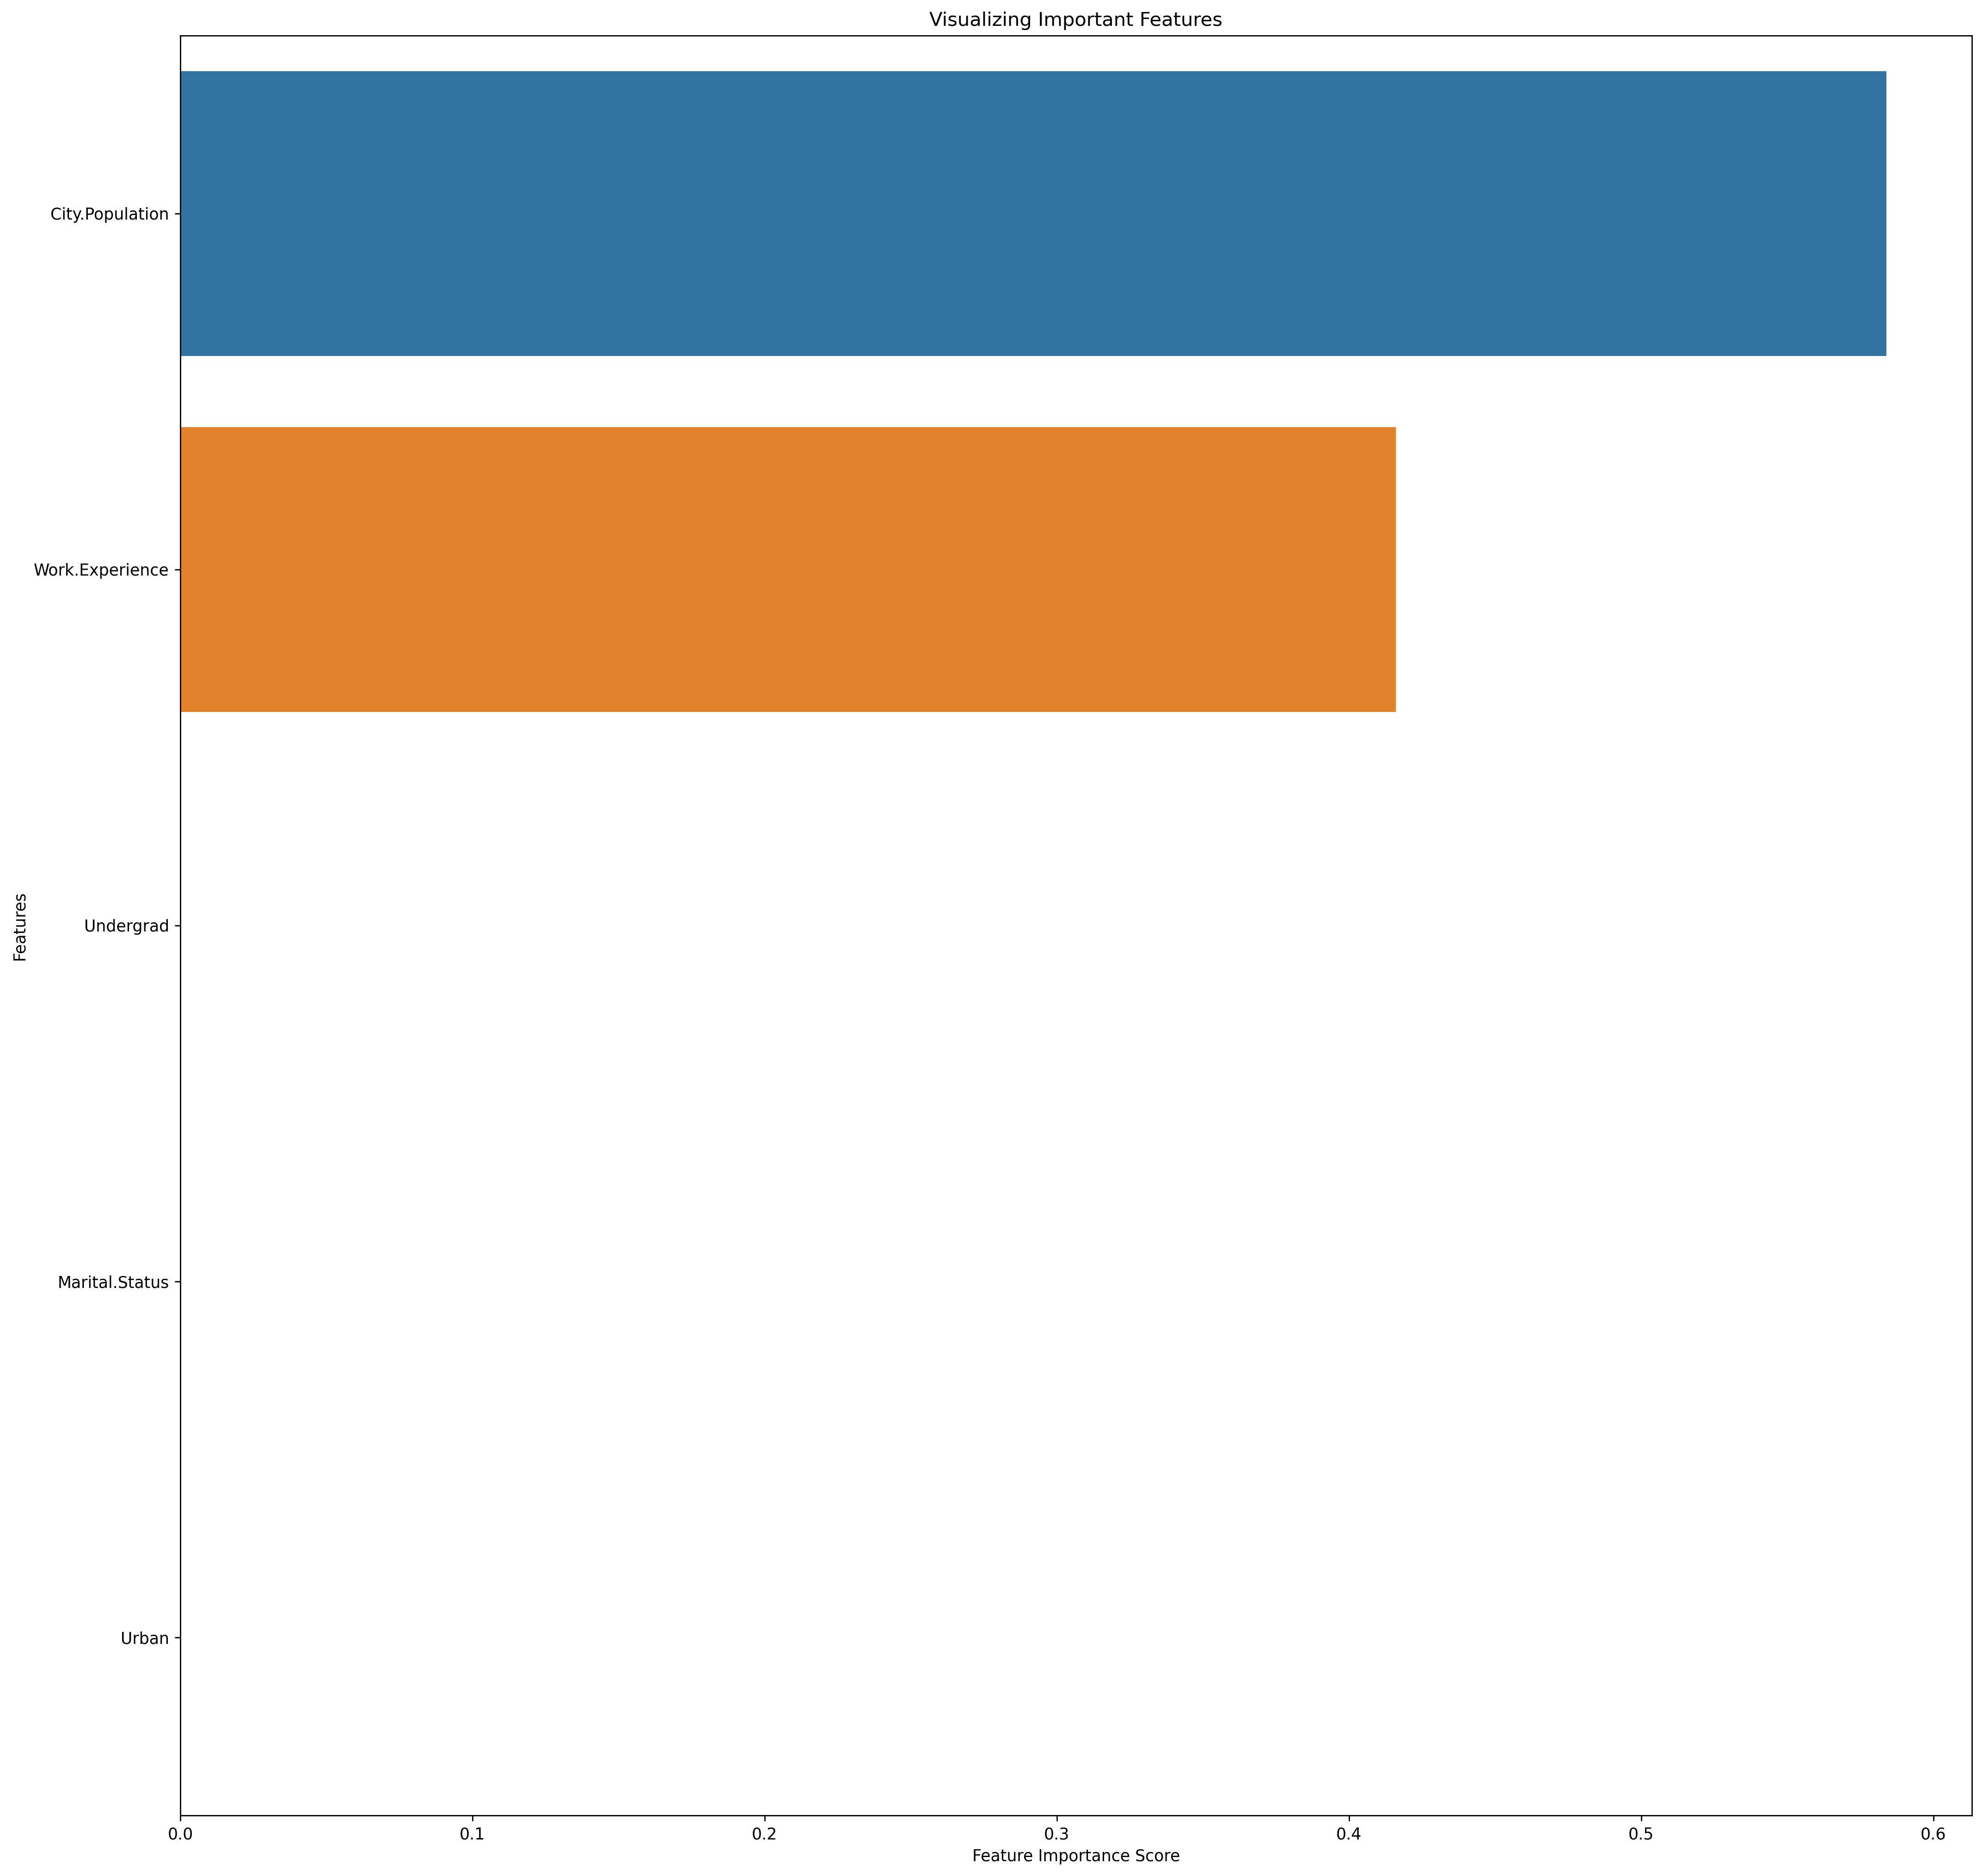

In [98]:
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [99]:
#Predicting on test data
preds = model.predict(xtest) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category  

0    117
1      3
dtype: int64

In [100]:
preds 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [101]:
pd.crosstab(ytest,preds)  # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1
Response,,
0,94,1
1,23,2


In [102]:
# Accuracy 
np.mean(preds==ytest)

0.8

# Building Decision Tree Classifier (CART) using Gini Criteria

In [103]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3) 

In [104]:
model_gini.fit(xtrain, ytrain) 

DecisionTreeClassifier(max_depth=3)

In [108]:
model.fit(xtrain,ytrain)
ypred = model.predict(xtest)

print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.80      0.99      0.89        95
           1       0.67      0.08      0.14        25

    accuracy                           0.80       120
   macro avg       0.74      0.53      0.51       120
weighted avg       0.77      0.80      0.73       120



In [113]:
model.feature_importances_ 

array([0.        , 0.        , 0.56220147, 0.41602491, 0.02177361])

In [109]:
confusion_matrix(ytest,ypred)

array([[94,  1],
       [23,  2]])

In [111]:
pred_train = model.predict(xtrain)

In [112]:
confusion_matrix(ytrain,pred_train)

array([[380,   1],
       [ 90,   9]])

In [114]:
#Prediction and computing the accuracy
pred=model.predict(xtest)
np.mean(preds==ytest) 

0.8

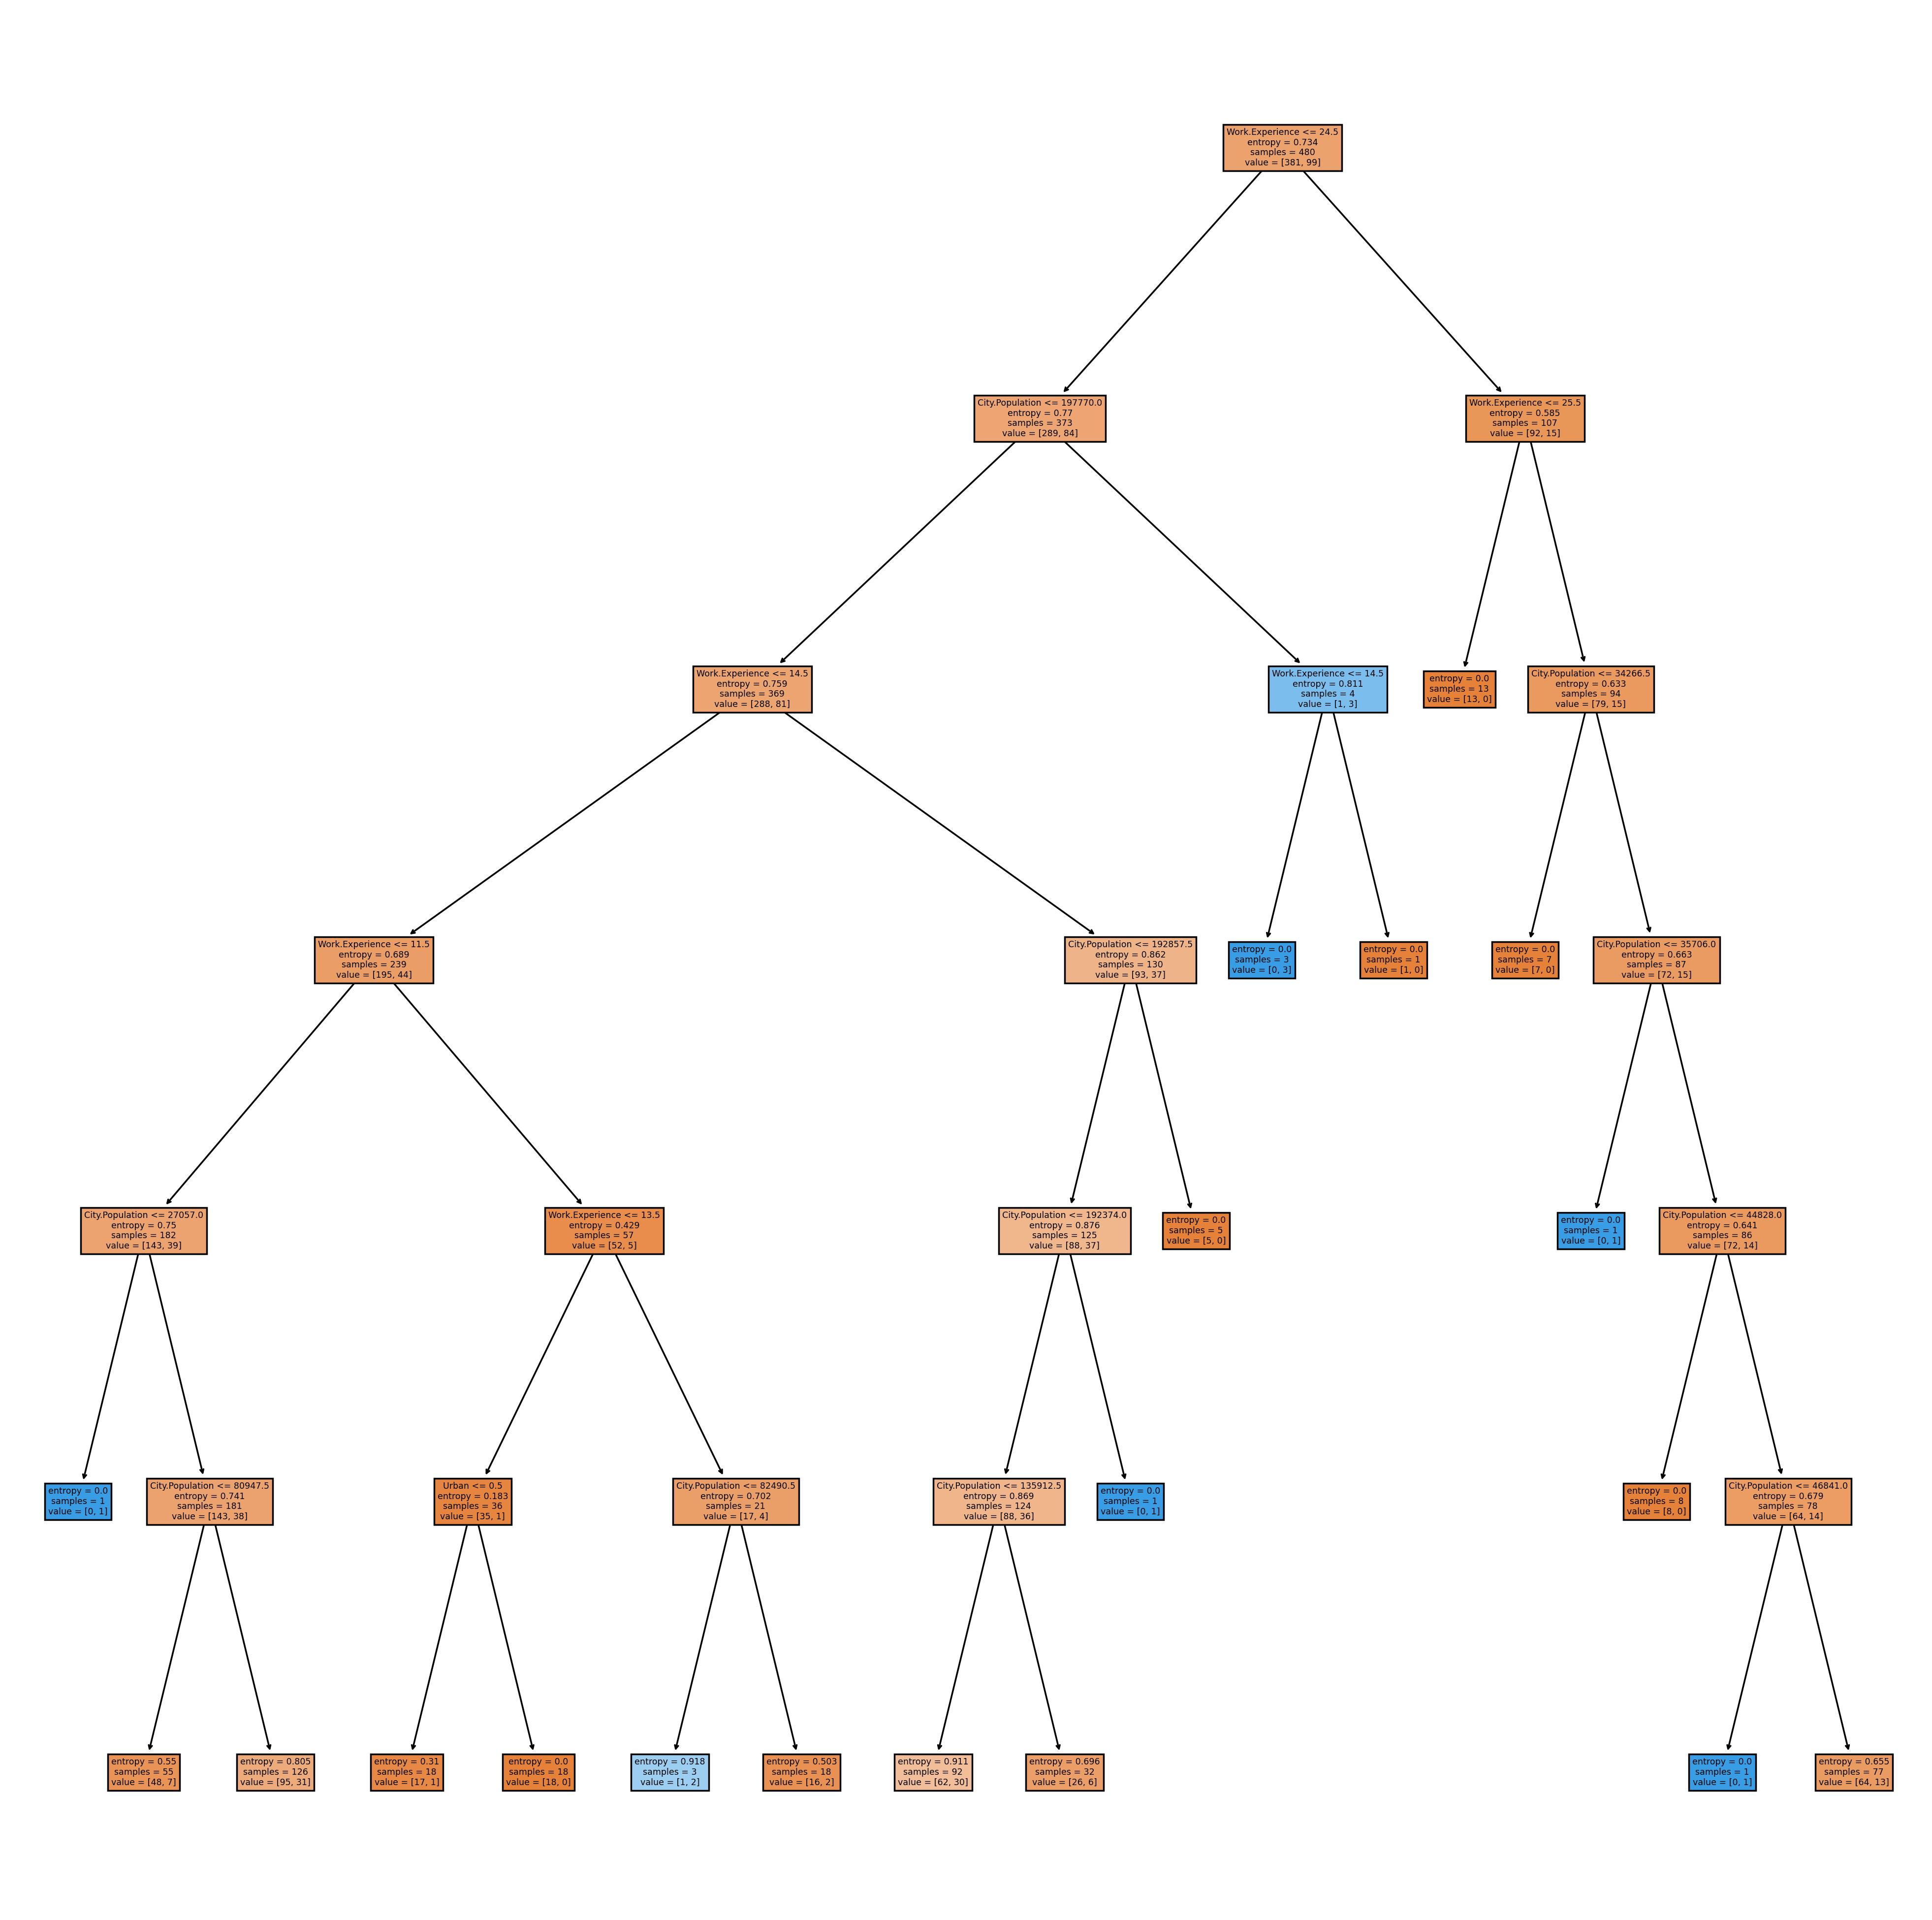

In [115]:
tree.plot_tree(model, feature_names=x.columns,filled=True)
plt.show()